In [1]:
# Map new data to hypoMap using scVI 

In [2]:
# Please download the model from https://github.com/lsteuernagel/mapscvi/tree/master/inst/extdata/models/hypoMap_harmonized_scVI_model
# and the hypoMap anndata from: https://www.mrl.ims.cam.ac.uk/ (or contact us if not yet available)
# the example query object can be found at https://github.com/lsteuernagel/mapscvi/tree/master/inst/python_notebook/

In [1]:
# Copy the files to your local file system and change the filepath below accordingly
model_path = "/beegfs/scratch/bruening_scratch/lsteuernagel/data/hypoMap_v2c_final/hypoMap_harmonized_scVI_model/"
hypomap_reference = "/beegfs/scratch/bruening_scratch/lsteuernagel/data/hypoMap_v2c_final/hypoMap_v2.h5ad"

In [3]:
# load scvi
# see here for an introduction: https://docs.scvi-tools.org/en/stable/tutorials/notebooks/scarches_scvi_tools.html
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import anndata
import scvi
import scanpy as sc

sc.set_figure_params(figsize=(4, 4))
scvi.settings.seed = 12345

Global seed set to 0
Global seed set to 12345


In [ ]:
# specify or load your anndata / the example
file_query = "/beegfs/scratch/bruening_scratch/lsteuernagel/data/tmp_mapscvi/query_romanov.h5ad"
adata_query = sc.read(file_query)

In [5]:
# load the reference anndata
adata_hypomap = sc.read("/beegfs/scratch/bruening_scratch/lsteuernagel/data/hypoMap_v2c_final/hypoMap_v2.h5ad")

NameError: name 'adata' is not defined

In [6]:
# add the UMAP in the right slot for plotting:
adata_hypomap.obsm['X_umap'] = adata_hypomap.obsm['X_umap_scvi']

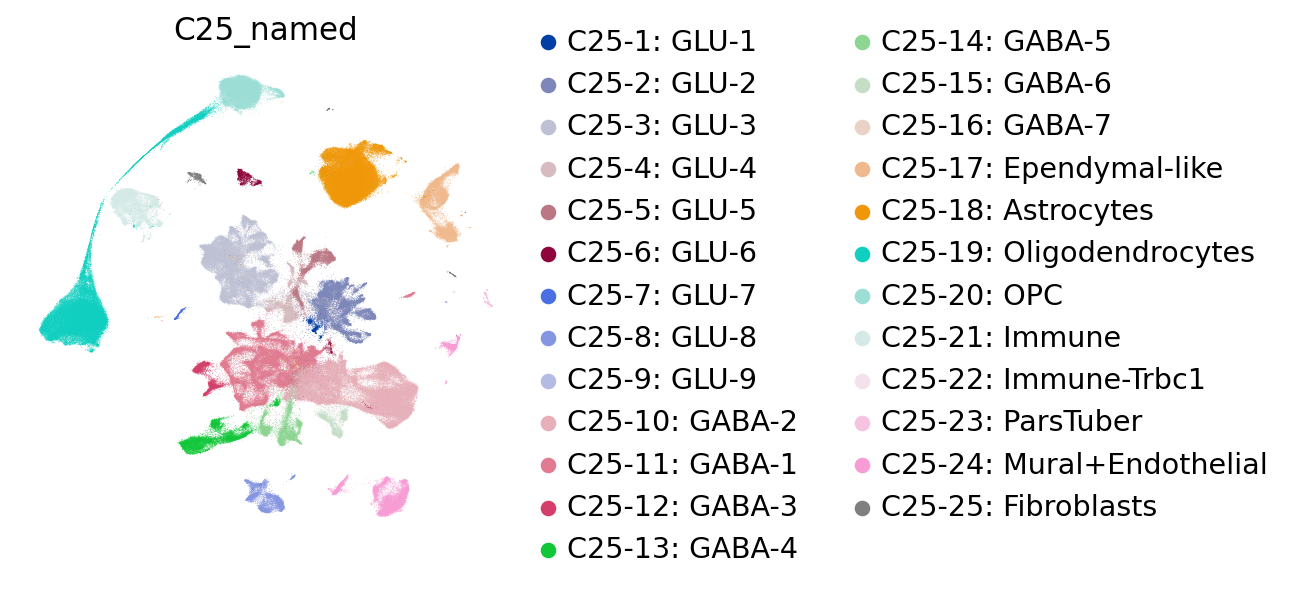

In [7]:
# plot the UMAP
sc.pl.umap(
    adata_hypomap,
    color=["C25_named"],
    frameon=False,
    ncols=1,
)

In [8]:
# the model requires Batch_ID as variable, we just add all data as one batch
adata_query.obs['Batch_ID'] = "romanov_batch_1"

In [9]:
# prepare query data
scvi.model.SCVI.prepare_query_anndata(adata_query, model_path)

INFO     File /beegfs/scratch/bruening_scratch/lsteuernagel/data/hypoMap_v2c_final/hypoMap_ha
         rmonized_scVI_model/model.pt already downloaded                                     
INFO     Found 89.9% reference vars in query data.                                           


/opt/conda/lib/python3.10/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


In [10]:
# create the new query model instance.
vae_query = scvi.model.SCVI.load_query_data(
    adata_query,
    model_path
)

INFO     File /beegfs/scratch/bruening_scratch/lsteuernagel/data/hypoMap_v2c_final/hypoMap_ha
         rmonized_scVI_model/model.pt already downloaded                                     


/opt/conda/lib/python3.10/site-packages/scvi/data/fields/_layer_field.py:90: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(


In [11]:
# train, potentially increase max_epochs
vae_query.train(max_epochs=20, plan_kwargs=dict(weight_decay=0.0))
adata_query.obsm["X_scVI"] = vae_query.get_latent_representation()

/opt/conda/lib/python3.10/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=20 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1933: PossibleUserWarning: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 1/20:   0%|                                        | 0/20 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 2/20:   5%|▋            | 1/20 [00:01<00:19,  1.04s/it, loss=971, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 3/20:  10%|█▎           | 2/20 [00:01<00:13,  1.34it/s, loss=964, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 4/20:  15%|█▉           | 3/20 [00:02<00:11,  1.53it/s, loss=956, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 5/20:  20%|██▌          | 4/20 [00:02<00:09,  1.66it/s, loss=942, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 6/20:  25%|███▎         | 5/20 [00:03<00:08,  1.74it/s, loss=929, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 7/20:  30%|███▉         | 6/20 [00:03<00:07,  1.77it/s, loss=917, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 8/20:  35%|████▌        | 7/20 [00:04<00:07,  1.82it/s, loss=907, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 9/20:  40%|█████▏       | 8/20 [00:04<00:06,  1.88it/s, loss=899, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 10/20:  45%|█████▍      | 9/20 [00:05<00:05,  1.85it/s, loss=891, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 11/20:  50%|█████▌     | 10/20 [00:05<00:05,  1.88it/s, loss=883, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 12/20:  55%|██████     | 11/20 [00:06<00:04,  1.89it/s, loss=876, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 13/20:  60%|██████▌    | 12/20 [00:06<00:04,  1.91it/s, loss=871, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 14/20:  65%|███████▏   | 13/20 [00:07<00:03,  1.92it/s, loss=867, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 15/20:  70%|███████▋   | 14/20 [00:07<00:03,  1.92it/s, loss=862, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 16/20:  75%|████████▎  | 15/20 [00:08<00:02,  1.91it/s, loss=858, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 17/20:  80%|████████▊  | 16/20 [00:08<00:02,  1.92it/s, loss=854, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 18/20:  85%|█████████▎ | 17/20 [00:09<00:01,  1.89it/s, loss=850, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 19/20:  90%|█████████▉ | 18/20 [00:09<00:01,  1.90it/s, loss=846, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/20:  95%|██████████▍| 19/20 [00:10<00:00,  1.92it/s, loss=845, v_num=1]

/opt/conda/lib/python3.10/site-packages/scvi/distributions/_negative_binomial.py:473: UserWarning: The value argument must be within the support of the distribution
  warnings.warn(


Epoch 20/20: 100%|███████████| 20/20 [00:11<00:00,  1.81it/s, loss=843, v_num=1]


In [12]:
## calculate UMAP based on hypoMAP:
sc.pp.neighbors(adata_query, use_rep="X_scVI")
sc.tl.leiden(adata_query)
sc.tl.umap(adata_query)

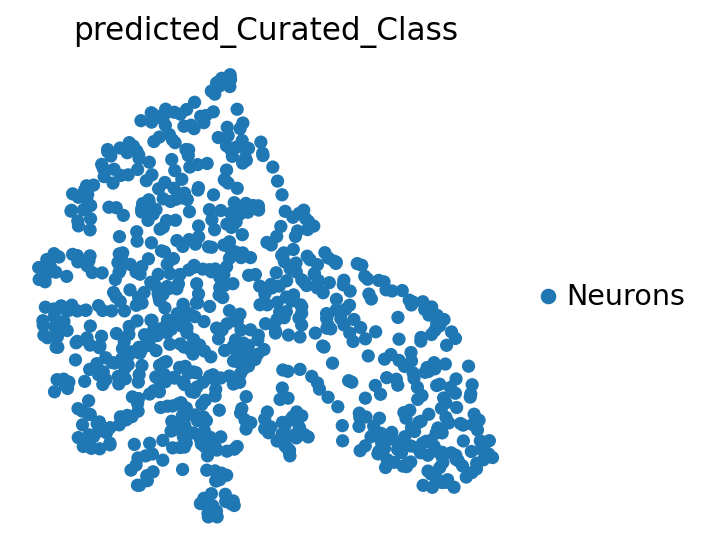

In [13]:
# plot UMAP
sc.pl.umap(
    adata_query,
    color=["predicted_Curated_Class"],
    frameon=False,
    ncols=1,
)